In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
from ipywidgets import interact
import matplotlib.pyplot as plt
import time

In [84]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [114]:
data = pd.read_csv('sudan-average-rainfall.csv')

In [115]:
data.head()

,Locality,2010-June,2010-July,2010-August,2010-September,2011- June,2011-July,2011- August,2011-September,2012- June,...,2018-June,2018-July,2018-August,2018-September,2019-June,2019-July,2019-August,2019-September,Unnamed: 41,Unnamed: 42
0,Abu Hamad,10.1373,49.4118,69.1961,20.7255,6.2941,83.5490,65.0784,10.6471,13.0588,...,27.0196,70.9412,81.4706,34.6275,19.3725,52.2745,83.0784,26.3333,NaN,NaN
1,Abu Jubaiyah,19.3130,80.4957,112.0696,26.7565,9.9130,97.3478,120.7652,20.9739,20.7130,...,52.5043,103.0783,113.5739,45.7565,36.5478,88.0435,103.8957,39.5391,NaN,NaN
2,Abyei,31.8424,99.2667,113.4303,43.4000,16.3636,87.5939,121.1273,38.6424,46.1152,...,85.4909,95.1515,133.1576,60.9030,59.6970,94.8909,115.1576,59.3152,NaN,NaN
3,Ad Damazin,16.1429,64.5275,89.6374,25.0440,7.3297,85.6154,84.0549,15.0769,21.3626,...,43.3626,83.8462,93.7912,44.2418,32.2857,71.5934,94.9011,35.4066,NaN,NaN
4,Ad Damer,14.4083,62.4541,83.1239,32.7156,8.9679,78.6376,86.1560,23.3716,23.3440,...,45.8165,80.6835,105.7018,48.6560,30.3945,70.1147,108.1835,39.9817,NaN,NaN


In [116]:
#Shape of Dataset
print('Shape of Dataset : ',data.shape)

Shape of Dataset :  (80, 43)


In [117]:
data.drop(data.columns[len(data.columns)-2 : len(data.columns)], axis=1, inplace=True)


In [118]:
data.shape
data.head()

,Locality,2010-June,2010-July,2010-August,2010-September,2011- June,2011-July,2011- August,2011-September,2012- June,...,2017-August,2017-September,2018-June,2018-July,2018-August,2018-September,2019-June,2019-July,2019-August,2019-September
0,Abu Hamad,10.1373,49.4118,69.1961,20.7255,6.2941,83.5490,65.0784,10.6471,13.0588,...,98.5490,21.0980,27.0196,70.9412,81.4706,34.6275,19.3725,52.2745,83.0784,26.3333
1,Abu Jubaiyah,19.3130,80.4957,112.0696,26.7565,9.9130,97.3478,120.7652,20.9739,20.7130,...,119.4348,40.1826,52.5043,103.0783,113.5739,45.7565,36.5478,88.0435,103.8957,39.5391
2,Abyei,31.8424,99.2667,113.4303,43.4000,16.3636,87.5939,121.1273,38.6424,46.1152,...,126.1455,61.2545,85.4909,95.1515,133.1576,60.9030,59.6970,94.8909,115.1576,59.3152
3,Ad Damazin,16.1429,64.5275,89.6374,25.0440,7.3297,85.6154,84.0549,15.0769,21.3626,...,109.7802,33.7363,43.3626,83.8462,93.7912,44.2418,32.2857,71.5934,94.9011,35.4066
4,Ad Damer,14.4083,62.4541,83.1239,32.7156,8.9679,78.6376,86.1560,23.3716,23.3440,...,123.2752,37.3532,45.8165,80.6835,105.7018,48.6560,30.3945,70.1147,108.1835,39.9817


In [170]:
location_column  = data.iloc[:, 0]
location_column.shape

(80,)

In [119]:
# data.describe()


In [120]:
# data.nunique()


In [121]:
# data.isnull().sum()


In [124]:
# new_data = data.T

In [125]:
# new_data.head()

In [126]:
# new_data.shape

In [328]:
data2 = data.rename(columns={x:y for x,y in zip(data.columns,range(0,len(data.columns)+1))})
data2 = data2.iloc[: , 1:]

data2.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,10.1373,49.4118,69.1961,20.7255,6.2941,83.5490,65.0784,10.6471,13.0588,117.9020,...,98.5490,21.0980,27.0196,70.9412,81.4706,34.6275,19.3725,52.2745,83.0784,26.3333
1,19.3130,80.4957,112.0696,26.7565,9.9130,97.3478,120.7652,20.9739,20.7130,160.1565,...,119.4348,40.1826,52.5043,103.0783,113.5739,45.7565,36.5478,88.0435,103.8957,39.5391
2,31.8424,99.2667,113.4303,43.4000,16.3636,87.5939,121.1273,38.6424,46.1152,152.2000,...,126.1455,61.2545,85.4909,95.1515,133.1576,60.9030,59.6970,94.8909,115.1576,59.3152
3,16.1429,64.5275,89.6374,25.0440,7.3297,85.6154,84.0549,15.0769,21.3626,146.3846,...,109.7802,33.7363,43.3626,83.8462,93.7912,44.2418,32.2857,71.5934,94.9011,35.4066
4,14.4083,62.4541,83.1239,32.7156,8.9679,78.6376,86.1560,23.3716,23.3440,131.0413,...,123.2752,37.3532,45.8165,80.6835,105.7018,48.6560,30.3945,70.1147,108.1835,39.9817


In [329]:
# Task 1  : get average of rainfall for the 3 months in each year. 
a = np.arange(0, len(data2.columns)) // 4*4
print (a)
# [ 0  0  0  0  4  4  4  4  8  8  8  8 12 12 12 12 16 16 16 16 20 20 20 20]



[ 0  0  0  0  4  4  4  4  8  8  8  8 12 12 12 12 16 16 16 16 20 20 20 20
 24 24 24 24 28 28 28 28 32 32 32 32 36 36 36 36]


In [330]:
len(a)

40

In [331]:
len(data2.columns)

40

In [332]:
average_data = data2.groupby(a, axis=1).mean()

In [333]:
average_data

,0,4,8,12,16,20,24,28,32,36
0,37.367675,41.392150,55.651950,33.245100,65.284300,21.965700,54.328425,51.215650,53.514725,45.264675
1,59.658700,62.249975,78.719550,50.676100,89.160875,36.600000,74.282625,71.821750,78.728250,67.006525
2,71.984850,65.931800,95.769700,64.937875,90.059100,53.283350,82.578800,85.660600,93.675750,82.265175
3,48.837950,48.019225,70.524700,44.560475,78.321450,29.280225,65.417575,63.543975,66.310450,58.546700
4,48.175475,49.283275,72.808500,48.708725,75.478200,34.250025,65.627300,67.385300,70.214450,62.168600
...,...,...,...,...,...,...,...,...,...,...
75,141.944925,140.842850,136.962650,132.140200,161.515025,132.708775,142.404475,166.107475,142.926050,163.379075
76,56.208875,57.872550,75.396375,42.952300,82.383225,34.172700,66.333050,67.697375,69.489300,60.291950
77,48.068425,50.620050,65.070425,38.720250,74.831350,28.206325,58.540675,58.783725,61.750000,52.127950
78,89.315475,94.955975,110.147600,88.714275,103.433350,90.170225,88.595250,100.534525,105.683325,99.490475


In [334]:
result = pd.concat([location_column, average_data], axis=1)

In [335]:
result.shape

(80, 11)

In [336]:
# column naming from 2010 to 2019
result.columns = ['Location','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019-Target']
result

,Location,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019-Target
0,Abu Hamad,37.367675,41.392150,55.651950,33.245100,65.284300,21.965700,54.328425,51.215650,53.514725,45.264675
1,Abu Jubaiyah,59.658700,62.249975,78.719550,50.676100,89.160875,36.600000,74.282625,71.821750,78.728250,67.006525
2,Abyei,71.984850,65.931800,95.769700,64.937875,90.059100,53.283350,82.578800,85.660600,93.675750,82.265175
3,Ad Damazin,48.837950,48.019225,70.524700,44.560475,78.321450,29.280225,65.417575,63.543975,66.310450,58.546700
4,Ad Damer,48.175475,49.283275,72.808500,48.708725,75.478200,34.250025,65.627300,67.385300,70.214450,62.168600
...,...,...,...,...,...,...,...,...,...,...,...
75,Um Badda,141.944925,140.842850,136.962650,132.140200,161.515025,132.708775,142.404475,166.107475,142.926050,163.379075
76,Um Kadada,56.208875,57.872550,75.396375,42.952300,82.383225,34.172700,66.333050,67.697375,69.489300,60.291950
77,Um Rawaba,48.068425,50.620050,65.070425,38.720250,74.831350,28.206325,58.540675,58.783725,61.750000,52.127950
78,Wadi Halfa,89.315475,94.955975,110.147600,88.714275,103.433350,90.170225,88.595250,100.534525,105.683325,99.490475


In [304]:
result['mean'] = result.mean(axis=1)
result = result.sort_values('mean' , ascending=False)
result.head(5)


,Location,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019-Target,mean
14,Al Gash,173.484400,154.519825,219.747925,149.612525,157.738550,187.766650,178.433325,182.703125,179.780200,194.464600,177.825112
16,Al Gutaina,166.275225,164.424300,197.518350,149.248850,161.793550,202.233950,176.068800,181.894525,168.441500,200.108925,176.800798
18,Al Kamlin,168.605625,140.068450,179.875775,159.480350,153.357200,145.461250,139.098175,191.614150,223.611475,196.181000,169.735345
10,Al Faw,192.301550,133.394200,217.228450,133.481075,155.615275,143.419500,165.535250,180.021575,167.843675,184.856300,167.369685
60,Sennar,160.271975,160.210975,168.585475,176.144625,149.885975,148.632075,159.312850,169.981275,183.890300,163.573750,164.048928


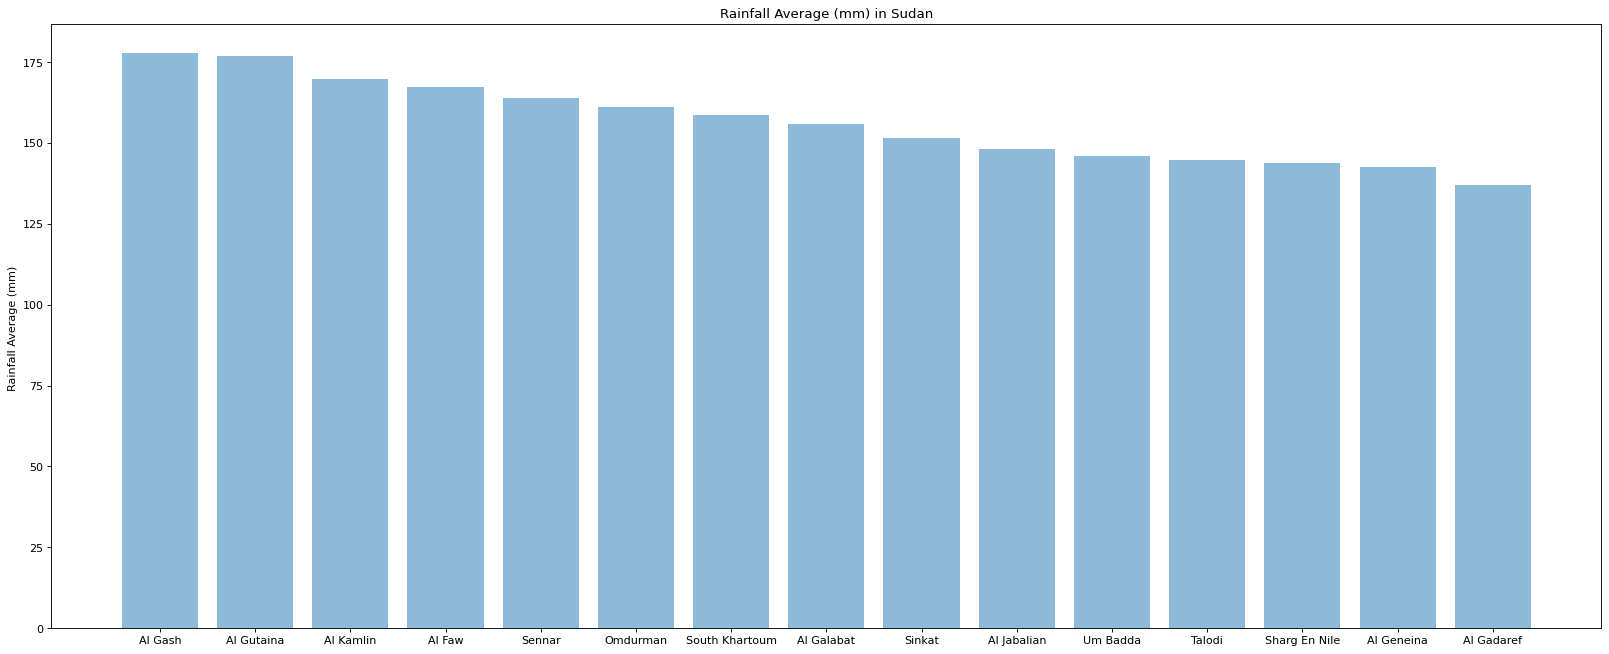

In [318]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(25, 10), dpi=80)
locations = result['Location'].head(15)
y_pos = np.arange(len(locations))
mean = result['mean'].head(15)

plt.bar(y_pos, mean, align='center', alpha=0.5)
plt.xticks(y_pos, locations)
plt.ylabel('Rainfall Average (mm) ')
plt.title('Rainfall Average (mm) in Sudan')

plt.show()

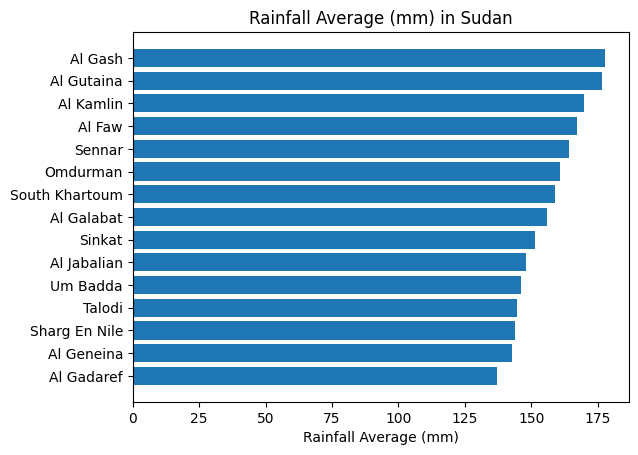

<Figure size 3200x800 with 0 Axes>

In [325]:
plt.rcdefaults()
fig, ax = plt.subplots()
figure(figsize=(40, 10), dpi=80)
ax.barh(y_pos, mean,  align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(locations)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rainfall Average (mm)')
ax.set_title('Rainfall Average (mm) in Sudan')

plt.show()

In [190]:
# Task 2 :  Train the model
# define x and y
x = result.drop(['2019-Target','Location'],axis=1).values
y = result['2019-Target'].values

In [252]:
# split data to train test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.15 )


In [201]:
# train the model (1) linear regression
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [204]:
# predict the model(1) linear regression
y_predict = lin_model.predict(x_test)


In [206]:
# example : expected ouput = 45.264675   
# lin_model.predict([[37.367675 , 41.392150 , 55.651950 , 33.245100 , 65.284300 , 21.965700 ,54.328425 ,51.215650 , 53.514725]])
# real output = array([47.51119035])


In [208]:
# evaluate the model (1)
from sklearn.metrics import r2_score
line_r2_score = r2_score(y_test,y_predict)
line_r2_score

0.9743478407156938

In [253]:
# plot resutl (1)



In [268]:
# # NN
# import tensorflow as tf

# input_size=9
# output_size=1
# models = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
# custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
# models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
# models.fit(x_train,y_train,epochs=100,verbose=1)

In [270]:
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=9, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
#Output layer
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
nn_model.summary()

history = nn_model.fit(x_train, y_train, validation_split=0.2, epochs =100)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 105ms/step - loss: 20112.9297 - mae: 114.7267 - val_loss: 20246.2305 - val_mae: 123.0991
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 13375.2500 - mae: 94.4347 - val_loss: 13301.0518 - val_mae: 99.4894
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 8916.1074 - mae: 76.1833 - 

2/2 [==============================] - 0s 18ms/step - loss: 66.1032 - mae: 6.2536 - val_loss: 66.0862 - val_mae: 6.4095
Epoch 57/100
2/2 [==============================] - 0s 17ms/step - loss: 65.8789 - mae: 6.2307 - val_loss: 66.2708 - val_mae: 6.4195
Epoch 58/100
2/2 [==============================] - 0s 17ms/step - loss: 65.7751 - mae: 6.2004 - val_loss: 66.3916 - val_mae: 6.4242
Epoch 59/100
2/2 [==============================] - 0s 21ms/step - loss: 65.6360 - mae: 6.1807 - val_loss: 66.3544 - val_mae: 6.4224
Epoch 60/100
2/2 [==============================] - 0s 22ms/step - loss: 65.4201 - mae: 6.1738 - val_loss: 66.2290 - val_mae: 6.4174
Epoch 61/100
2/2 [==============================] - 0s 24ms/step - loss: 65.2615 - mae: 6.1744 - val_loss: 66.0563 - val_mae: 6.4101
Epoch 62/100
2/2 [==============================] - 0s 18ms/step - loss: 64.9263 - mae: 6.1732 - val_loss: 65.8822 - val_mae: 6.4027
Epoch 63/100
2/2 [==============================] - 0s 20ms/step - loss: 64.9755 -

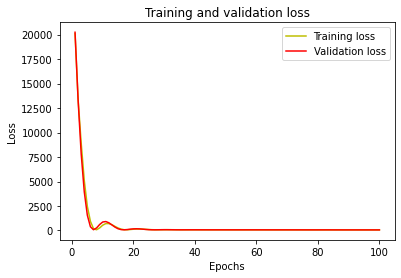

In [271]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [278]:

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = nn_model.evaluate(x_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


1/1 [==============================] - 0s 13ms/step - loss: 159.2421 - mae: 9.7804
Mean squared error from neural net:  159.2421112060547
Mean absolute error from neural net:  9.780372619628906


In [280]:

######################################################################
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

############################################################


Mean squared error from linear regression:  158.08923956216213
Mean absolute error from linear regression:  8.971640055564313


In [282]:
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)


Mean squared error using decision tree:  115.86086056151056
Mean absolute error using decision tree:  7.88823125


In [285]:

##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(x_train, y_train)

y_pred_RF = model.predict(x_test)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)


Mean squared error using Random Forest:  78.13706435314432
Mean absolute error Using Random Forest:  6.839290208333339
